# 05.01 - TIME SERIES PREDICTIONS

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import local.lib.timeseries as ts
%matplotlib inline

## The data

In [2]:
d = pd.read_csv("local/data/eurcop.csv")
d.index = pd.to_datetime(d.Date)
del(d["Date"])
d.head()

,Rate,High (est),Low (est)
Date,,,
1999-09-06,2068.55,0.0,0.0
1999-09-07,2078.17,2103.0,2053.7
1999-09-08,2091.05,0.0,0.0
1999-09-09,2093.84,2118.6,2069.4
1999-09-10,2087.55,0.0,0.0


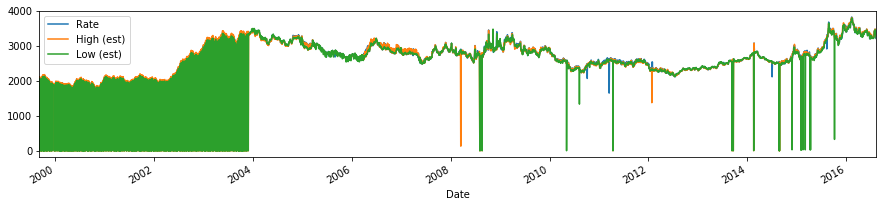

In [3]:
d.plot(figsize=(15,3))

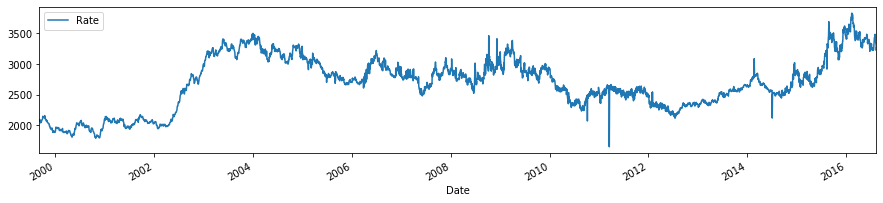

In [4]:
d[["Rate"]].plot(figsize=(15,3))

In [241]:
d = d[["Rate"]]
d.head(10)

,Rate
Date,
1999-09-06,2068.55
1999-09-07,2078.17
1999-09-08,2091.05
1999-09-09,2093.84
1999-09-10,2087.55
1999-09-13,2062.96
1999-09-14,2047.08
1999-09-15,2040.93
1999-09-16,2047.17


## A predictive model

### First create a time series dataset with look back

In [421]:
dt = ts.timeseries_as_many2one(d, columns=["Rate"], nb_timesteps_in=4, timelag=0)
dt.head()

,Rate_0,Rate_1,Rate_2,Rate_3,Rate
Date,,,,,
1999-09-10,2068.55,2078.17,2091.05,2093.84,2087.55
1999-09-13,2078.17,2091.05,2093.84,2087.55,2062.96
1999-09-14,2091.05,2093.84,2087.55,2062.96,2047.08
1999-09-15,2093.84,2087.55,2062.96,2047.08,2040.93
1999-09-16,2087.55,2062.96,2047.08,2040.93,2047.17


### Split dataset for trian and for test

(5040, 5) (2691, 5) (2349, 5)


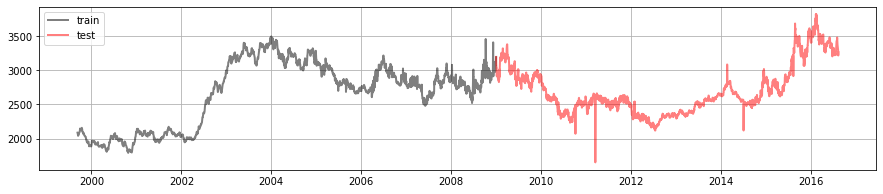

In [425]:
trds = dt[:"2008"]
tsds = dt["2009":]
print (dt.shape, trds.shape, tsds.shape)
plt.figure(figsize=(15,3))
plt.plot(trds.index.values, trds.Rate.values, color="black", lw=2, label="train", alpha=.5)
plt.plot(tsds.index.values, tsds.Rate.values, color="red", lw=2, label="test", alpha=.5)
plt.grid();
plt.legend();

### Create `X` and `y` matrices for train and test

In [426]:
Xtr, ytr = trds[[i for i in trds.columns if i!="Rate"]].values, trds.Rate.values
Xts, yts = tsds[[i for i in tsds.columns if i!="Rate"]].values, tsds.Rate.values

In [427]:
trds[:5]

,Rate_0,Rate_1,Rate_2,Rate_3,Rate
Date,,,,,
1999-09-10,2068.55,2078.17,2091.05,2093.84,2087.55
1999-09-13,2078.17,2091.05,2093.84,2087.55,2062.96
1999-09-14,2091.05,2093.84,2087.55,2062.96,2047.08
1999-09-15,2093.84,2087.55,2062.96,2047.08,2040.93
1999-09-16,2087.55,2062.96,2047.08,2040.93,2047.17


In [428]:
print (Xtr[:10])
print (ytr[:10])

[[2068.55 2078.17 2091.05 2093.84]
 [2078.17 2091.05 2093.84 2087.55]
 [2091.05 2093.84 2087.55 2062.96]
 [2093.84 2087.55 2062.96 2047.08]
 [2087.55 2062.96 2047.08 2040.93]
 [2062.96 2047.08 2040.93 2047.17]
 [2047.08 2040.93 2047.17 2060.87]
 [2040.93 2047.17 2060.87 2065.02]
 [2047.17 2060.87 2065.02 2061.61]
 [2060.87 2065.02 2061.61 2080.33]]
[2087.55 2062.96 2047.08 2040.93 2047.17 2060.87 2065.02 2061.61 2080.33
 2085.85]


In [429]:
tsds[:5]

,Rate_0,Rate_1,Rate_2,Rate_3,Rate
Date,,,,,
2009-01-01,3079.180176,3079.180176,3140.934326,3193.720215,3197.497070
2009-01-02,3079.180176,3140.934326,3193.720215,3197.497070,3093.394775
2009-01-04,3140.934326,3193.720215,3197.497070,3093.394775,3029.256836
2009-01-05,3193.720215,3197.497070,3093.394775,3029.256836,3029.256836
2009-01-06,3197.497070,3093.394775,3029.256836,3029.256836,2914.927246


In [430]:
print (Xts[:10])
print (yts[:20])

[[3079.18017578 3079.18017578 3140.93432617 3193.72021484]
 [3079.18017578 3140.93432617 3193.72021484 3197.49707031]
 [3140.93432617 3193.72021484 3197.49707031 3093.39477539]
 [3193.72021484 3197.49707031 3093.39477539 3029.25683594]
 [3197.49707031 3093.39477539 3029.25683594 3029.25683594]
 [3093.39477539 3029.25683594 3029.25683594 2914.92724609]
 [3029.25683594 3029.25683594 2914.92724609 2969.78344727]
 [3029.25683594 2914.92724609 2969.78344727 2954.19067383]
 [2914.92724609 2969.78344727 2954.19067383 2983.23510742]
 [2969.78344727 2954.19067383 2983.23510742 2923.44677734]]
[3197.49707031 3093.39477539 3029.25683594 3029.25683594 2914.92724609
 2969.78344727 2954.19067383 2983.23510742 2923.44677734 2923.44677734
 2913.42114258 2897.17138672 2885.69604492 2940.19921875 2941.0378418
 2941.0378418  2878.10864258 2848.63378906 2873.06689453 2828.56445312]


### convert target into classification task for TREND PREDICTION (1 up, 0 down)

In [431]:
yts = (yts>Xts[:,-1]).astype(int)
ytr = (ytr>Xtr[:,-1]).astype(int)
print (ytr[:20])
print (yts[:20])

[0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0]
[1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0]


### inspect target class distributions

In [432]:
print ("1's in train %.2f%s"%(np.mean(ytr)*100, "%"))
print ("1's in test  %.2f%s"%(np.mean(yts)*100, "%"))

1's in train 45.04%
1's in test  41.72%


### train a predictive model

In [436]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
estimator = RandomForestClassifier(n_estimators=5, max_depth=30)
#estimator = DecisionTreeClassifier(max_depth=2)
#estimator = LogisticRegression()
#estimator = Pipeline((("pca", PCA(n_components=2)), ("estimator", estimator)))
estimator.fit(Xtr,ytr);

### get predictive accuracy in train and test

In [437]:
print ("train accuracy %.2f"%estimator.score(Xtr,ytr))
print ("test accuracy  %.2f"%estimator.score(Xts,yts))


train accuracy 0.92
test accuracy  0.52


### inspect confusion matrix

Text(0.5, 1, 'Confusion Matrix')

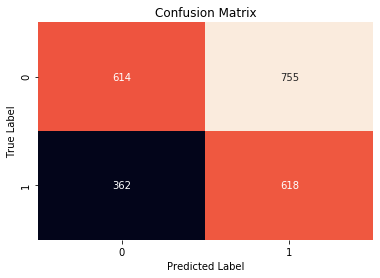

In [438]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(yts, estimator.predict(Xts))
sns.heatmap(cm,annot=True,cbar=False, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')


## A strategy

- if model predicts 1 (price up) we buy 10 EUR today and sell them tomorrow
- if model predicts 0 (price down) we sell 10 EUR today and buy them tomorrow

In [439]:
def trade(d, date_close, op, qty):
    assert op in ["buy", "sell"]
    assert qty>=0
    
    r = (d.loc[:date_close].iloc[-2].Rate-d.loc[date_close].Rate)*qty    
    if op=="buy":
        r = -r
    return r

example: a **buy** operation on 2011-01-03 closed (with a sell operation) on 2011-01-04

In [440]:
trade(tsds, "2011-01-04", "buy", 100)

701.0498039999675

In [441]:
trade(tsds, "2011-01-05", "buy", 100)

-77.17285099997753

In [442]:
tsds["2011-01-02":].iloc[:5]

,Rate_0,Rate_1,Rate_2,Rate_3,Rate
Date,,,,,
2011-01-02,2528.971680,2528.971680,2618.146240,2567.137939,2520.103760
2011-01-03,2528.971680,2618.146240,2567.137939,2520.103760,2520.103760
2011-01-04,2618.146240,2567.137939,2520.103760,2520.103760,2527.114258
2011-01-05,2567.137939,2520.103760,2520.103760,2527.114258,2526.342529
2011-01-06,2520.103760,2520.103760,2527.114258,2526.342529,2478.751709


In [443]:
yts

array([1, 0, 0, ..., 0, 0, 1])

In [444]:
def compute_pnl(d, y, predictions, qty=10):
    pnl = []
    for date,prediction in zip(d.index[1:], predictions[1:]):
        pnl.append(trade(d, date, "sell" if prediction==0 else "buy", qty))
    pnl = pd.DataFrame(np.r_[[pnl]].T, index=d.index[1:], columns=["pnl"])
    pnl["prediction"]=predictions[1:]
    pnl["y"]=y[1:]
    return pnl

In [445]:
preds = estimator.predict(Xts)
pnl = compute_pnl(tsds, yts, preds)


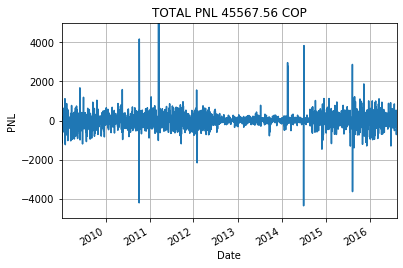

In [446]:
pnl.pnl.plot()
plt.title("TOTAL PNL %.2f COP"%pnl.pnl.sum())
plt.ylabel("PNL")
plt.grid();
plt.ylim(-5000,5000);

In [447]:
def plot_pnlhist(pnl_series, label=""):
    k = pnl_series.values
    total = np.sum(k); 
    k = k[np.abs(k)<50000]
    plt.hist(k, bins=30);
    plt.title("PNL for %s, total %.2f COP"%(label, total))

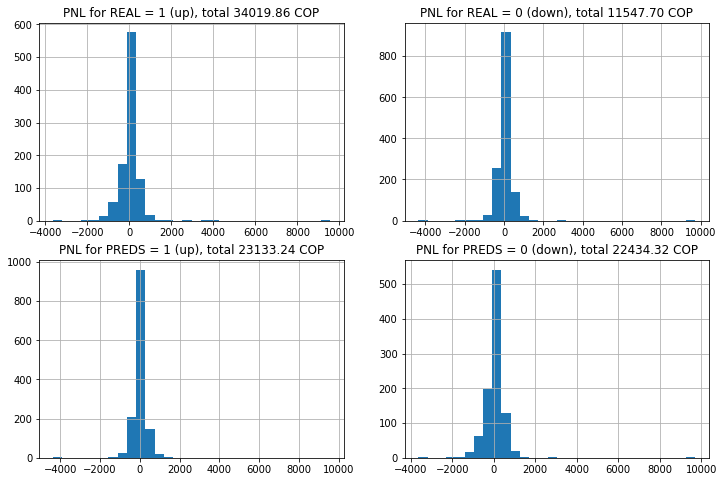

In [448]:
plt.figure(figsize=(12,8))
plt.subplot(221); plot_pnlhist(pnl[pnl.y==1].pnl, "REAL = 1 (up)"); plt.grid();
plt.subplot(222); plot_pnlhist(pnl[pnl.y==0].pnl, "REAL = 0 (down)"); plt.grid();
plt.subplot(223); plot_pnlhist(pnl[preds[1:]==1].pnl, "PREDS = 1 (up)"); plt.grid();
plt.subplot(224); plot_pnlhist(pnl[preds[1:]==0].pnl, "PREDS = 0 (down)"); plt.grid();